# Getting the Credit-score data from Kaggle

In [1]:
#import relevant libraries
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# !kaggle datasets download -d parisrohan/credit-score-classification -p /content
# !unzip /content/credit-score-classification.zip -d /content

#train_data = pd.read_csv(r'C:\Users\Behzad\Documents\GitHub\Credit_Score_Prediction\Datasets\train.csv')
#test_data = pd.read_csv('/content/test.csv')

train_data = pd.read_csv('C:/Users/rajih/OneDrive/Documents/GitHub/E-commerce_Promotion_Analysis/Datasets/train.csv')
test_data = pd.read_csv('C:/Users/rajih/OneDrive/Documents/GitHub/E-commerce_Promotion_Analysis/Datasets/test.csv')
#'/content/test.csv'
# Training and testing sets
print("Training data shape:", train_data.shape)
#print("Testing data shape:", test_data.shape)

C:\Users\rajih\AppData\Local\Temp\ipykernel_31160\2046339768.py:12: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('C:/Users/rajih/OneDrive/Documents/GitHub/E-commerce_Promotion_Analysis/Datasets/train.csv')


Training data shape: (100000, 28)


# Exploratory Data Analysis

Study each attribute and its characteristics:

*   Name
*   Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
*   % of missing values
*   Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
*   Possibly useful for the task?
*   Type of distribution (Gaussian, uniform, logarithmic, etc)

Quick look into the columns

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Checking for duplicates

In [4]:
train_data.duplicated().sum()

0

Quick look into first few rows

In [5]:
train_data.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
96105,0x2491f,CUS_0x3237,February,Tomg,18,066-87-9187,Media_Manager,54651.78,4359.315000,9,9,16,8,"Debt Consolidation Loan, Credit-Builder Loan, ...",49,24,25.64,10.0,Bad,4548.76,24.960143,6 Years and 8 Months,Yes,295.386576,398.24383298542506,Low_spent_Large_value_payments,12.301090948531225,Poor
94845,0x241bb,CUS_0x7a01,June,Supanthao,24,323-84-9870,Media_Manager,17030.26,1625.188333,5,7,8,3,"Home Equity Loan, Payday Loan, and Home Equity...",16,19,16.21,8.0,Standard,299.0,37.793311,28 Years and 8 Months,Yes,23.871428,136.1995200171922,Low_spent_Small_value_payments,292.44788497139325,Standard
35963,0xe8b9,CUS_0x7429,April,Kumarz,3853,378-86-7375,Manager,38861.72,NaN,4,5,11,1,Mortgage Loan,10,1,3.83,4.0,Good,107.29,30.087648,30 Years and 11 Months,No,26.069204,94.03558557509537,High_spent_Small_value_payments,491.0428771775012,Good
82182,0x1f788,CUS_0xc063,July,Kimt,27,987-95-1111,Entrepreneur,14403.39,922.282500,5,4,8,3,"Mortgage Loan, Mortgage Loan, and Mortgage Loan",11,12,_,4.0,Standard,2630.82,33.029482,14 Years and 7 Months,Yes,23.304315,58.22807101234733,Low_spent_Medium_value_payments,290.69586378017215,Standard
23689,0xa0cf,CUS_0x2bdd,February,Mutikanio,33,162-35-9568,Scientist,68090.85,5717.237500,7,4,20,1,Auto Loan,0,13,2.43,4.0,Standard,791.78,25.113968,22 Years and 6 Months,No,31.245931,NaN,High_spent_Medium_value_payments,568.6038400790081,Standard


Changing the types of columns

In [6]:
num_cols = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card","Interest_Rate","Num_of_Loan", "Delay_from_due_date","Num_of_Delayed_Payment","Changed_Credit_Limit", "Num_Credit_Inquiries","Outstanding_Debt","Credit_Utilization_Ratio","Total_EMI_per_month","Amount_invested_monthly",	"Monthly_Balance","Credit_History_Age"]
cat_cols = ["Occupation","Credit_Mix", "Spending_Level","Payment_Value","Payment_of_Min_Amount"]
target_col = ["Credit_Score"]

In [7]:
class DataCleaner:
    def __init__(self, dataframe, numeric_columns):
        self.dataframe = dataframe
        self.numeric_columns = numeric_columns

    def clean_numeric_columns(self):

        for col in self.numeric_columns:

            if self.dataframe[col].dtype == 'object':
                self.dataframe[col] = self.dataframe[col].str.extract(r'(\d+)')
                self.dataframe[col] = pd.to_numeric(self.dataframe[col], errors='coerce')
                self.dataframe[col] = self.dataframe[col].fillna(self.dataframe[col].median())

            else:
                self.dataframe[col] = self.dataframe[col].fillna(self.dataframe[col].median())

        return self.dataframe



cleaner = DataCleaner(train_data, num_cols)
df = cleaner.clean_numeric_columns()

% of missing values

In [8]:
df.isnull().sum()/float(len(df))*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary        0.000
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       0.000
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         0.000
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           0.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      0.000
Payment_Behaviour            0.000
Monthly_Balance              0.000
Credit_Score                 0.000
dtype: float64

Looking into Null-values in Name

In [9]:
df['Name'].nunique()

10139

In [10]:
df[df['Name'].isnull()].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6.0,11.0,4.0,Good,809,23.933795,18.0,No,49.574949,24.0,High_spent_Medium_value_payments,358.0,Standard
17,0x161b,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",13,6.0,7.0,3.0,Good,1303,41.702573,17.0,No,246.992319,232.0,High_spent_Small_value_payments,998.0,Good
22,0x1620,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6.0,7.0,3.0,Good,1303,38.068624,18.0,No,246.992319,263.0,High_spent_Small_value_payments,968.0,Standard
64,0x1662,CUS_0x4157,January,NaN,23,070-19-1622,Doctor,114838,9843.867500,2,5,7,100,"Personal Loan, Debt Consolidation Loan, and Au...",13,11.0,8.0,3.0,Good,1377,33.664554,21.0,No,226.892792,215.0,High_spent_Small_value_payments,802.0,Good
80,0x167a,CUS_0xa66b,January,NaN,40,221-30-8554,Teacher,33751,2948.605833,5,5,20,3,"Credit-Builder Loan, Personal Loan, and Auto Loan",16,20.0,11.0,4.0,Standard,1328,37.089076,19.0,NM,65.008174,117.0,High_spent_Medium_value_payments,362.0,Standard


Looking into null-values for Type of Loan

In [12]:
df['Type_of_Loan'].nunique()

6260

In [13]:
df[df['Type_of_Loan'].isnull()].head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
32,0x1632,CUS_0x1cdb,January,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,NaN,5,14.0,2.0,4.0,Standard,943,39.797764,30.0,Yes,0.0,276.0,!@9#%8,288.0,Standard
33,0x1633,CUS_0x1cdb,February,Deepaa,21,615-06-7821,Developer,35547,3093.745000,7,5,5,0,NaN,9,14.0,2.0,4.0,Standard,943,27.020360,30.0,NM,0.0,74.0,High_spent_Medium_value_payments,460.0,Standard
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,100,NaN,5,12.0,2.0,4.0,Standard,943,23.462303,30.0,Yes,0.0,173.0,Low_spent_Medium_value_payments,392.0,Standard
35,0x1635,CUS_0x1cdb,April,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,NaN,1,15.0,2.0,4.0,_,943,28.924954,30.0,Yes,0.0,96.0,High_spent_Medium_value_payments,438.0,Standard
36,0x1636,CUS_0x1cdb,May,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,NaN,9,17.0,2.0,4.0,_,943,41.776187,31.0,Yes,0.0,62.0,High_spent_Small_value_payments,482.0,Standard
37,0x1637,CUS_0x1cdb,June,Deepaa,21,615-06-7821,Developer,35547,3093.745000,7,5,5,0,NaN,5,15.0,2.0,4.0,Standard,943,29.217556,31.0,Yes,0.0,37.0,High_spent_Medium_value_payments,497.0,Standard
38,0x1638,CUS_0x1cdb,July,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,NaN,10,15.0,2.0,4.0,Standard,943,26.263823,31.0,Yes,0.0,181.0,Low_spent_Small_value_payments,394.0,Standard
39,0x1639,CUS_0x1cdb,August,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,100,NaN,1,15.0,2.0,4.0,Standard,943,25.862922,31.0,Yes,0.0,181.0,High_spent_Small_value_payments,364.0,Standard
40,0x163e,CUS_0x95ee,January,Np,31,612-70-8987,Lawyer,73928,3093.745000,4,1288,8,0,NaN,12,10.0,10.0,2.0,Good,548,39.962685,18.0,No,15015.0,98.0,High_spent_Large_value_payments,740.0,Good
41,0x163f,CUS_0x95ee,February,Np,31,612-70-8987,_______,73928,5988.705000,4,5,8,0,NaN,8,7.0,10.0,2.0,Good,548,42.769864,32.0,NM,0.0,172.0,Low_spent_Medium_value_payments,705.0,Good


In [14]:
df[df['Type_of_Loan'].isnull() & (df['Num_of_Loan'] != 0)].head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,100,NaN,5,12.0,2.0,4.0,Standard,943,23.462303,30.0,Yes,0.0,173.0,Low_spent_Medium_value_payments,392.0,Standard
39,0x1639,CUS_0x1cdb,August,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,100,NaN,1,15.0,2.0,4.0,Standard,943,25.862922,31.0,Yes,0.0,181.0,High_spent_Small_value_payments,364.0,Standard
180,0x170e,CUS_0xac86,May,Nickb,20,028-16-4402,Entrepreneur,106733,8873.427500,4,4,1,100,NaN,5,6.0,0.0,0.0,Good,76,28.820554,33.0,No,0.0,345.0,High_spent_Medium_value_payments,791.0,Good
327,0x17e9,CUS_0xb5ff,August,Nateg,33,060-81-1328,Media_Manager,12909,853.824583,5,5,13,100,NaN,22,15.0,7.0,3.0,Standard,602,23.579851,17.0,No,0.0,60.0,Low_spent_Medium_value_payments,305.0,Standard
355,0x1815,CUS_0xaedb,April,Olivia Oranr,19,272-47-1135,Musician,85554,7185.502500,4,2,3,100,NaN,12,7.0,6.0,3.0,Good,1095,31.360245,19.0,No,0.0,303.0,Low_spent_Large_value_payments,684.0,Good
356,0x1816,CUS_0xaedb,May,Olivia Oranr,19,272-47-1135,Musician,85554,7185.502500,1488,2,3,100,NaN,14,14.0,6.0,3.0,_,1095,41.661802,19.0,No,0.0,70.0,High_spent_Large_value_payments,887.0,Good
427,0x1881,CUS_0x9ce6,April,Ekr,43,#F%$D@*&8,Developer,123732,10416.026667,4,3,11,100,NaN,15,8.0,11.0,3.0,Good,1154,38.990635,27.0,No,0.0,532.0,Low_spent_Medium_value_payments,789.0,Standard
449,0x18a3,CUS_0x3f5b,February,Mikeh,25,#F%$D@*&8,Doctor,80108,6866.692500,5,3,17,100,NaN,28,19.0,14.0,1.0,Standard,997,26.173145,17.0,Yes,0.0,52.0,High_spent_Large_value_payments,874.0,Standard
712,0x1a2e,CUS_0x3861,January,Fiona Ortizx,53,212-32-2085,Engineer,17992,3093.745000,3,5,6,100,NaN,5,9.0,8.0,2.0,Good,565,22.380399,18.0,No,0.0,88.0,!@9#%8,348.0,Poor
953,0x1b97,CUS_0x567b,February,Marilynj,54,542-44-1751,Manager,80396,6623.738333,5,7,9,100,NaN,8,11.0,10.0,0.0,Good,1357,37.808974,26.0,No,0.0,482.0,Low_spent_Large_value_payments,450.0,Good


We can see some of the rows with empty Type_of_Load values with really high value of Num_of Loan. Changing the values of Num of Loans to zero where the type of loan is empty since these seem to be errors

In [15]:
df[df['Type_of_Loan'].isnull()]['Num_of_Loan'].value_counts().head()

Num_of_Loan
0      10930
100      417
50         2
911        2
439        1
Name: count, dtype: int64

Testing to see if all people with no loans have empty type of load column

In [16]:
df[df['Num_of_Loan'] == 0]['Type_of_Loan'].value_counts().head()

Series([], Name: count, dtype: int64)

Testing for people who do have type of loan in the column but have unreasonably high values of number of loans

In [17]:
df2 = df[~df['Type_of_Loan'].isnull()]

df2[df2['Num_of_Loan'] > 20]['Num_of_Loan'].value_counts().head()

Num_of_Loan
100     3460
1150       4
1228       3
430        3
1480       3
Name: count, dtype: int64

Testing on a customer level to see if its an error or genuine values

In [20]:
df2[df2['Name'] == 'Lauren Tarao' ].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
31008,0xcbb2,CUS_0xedd,January,Lauren Tarao,30,888-82-5609,Engineer,125468,10445.703333,4,4,10,4,"Payday Loan, Credit-Builder Loan, Personal Loa...",23,13.0,10.0,4.0,Standard,1136,29.866322,19.0,Yes,338.092409,227.0,High_spent_Large_value_payments,718.0,Standard
31009,0xcbb3,CUS_0xedd,February,Lauren Tarao,30,888-82-5609,Engineer,125468,10445.703333,4,4,10,4,"Payday Loan, Credit-Builder Loan, Personal Loa...",15,16.0,10.0,4.0,Standard,1136,30.955492,19.0,Yes,338.092409,209.0,High_spent_Small_value_payments,757.0,Standard
31010,0xcbb4,CUS_0xedd,March,Lauren Tarao,30,888-82-5609,Engineer,125468,10445.703333,4,4,10,4,"Payday Loan, Credit-Builder Loan, Personal Loa...",18,10.0,5.0,4.0,Standard,1136,30.499955,19.0,Yes,338.092409,814.0,Low_spent_Medium_value_payments,171.0,Standard
31011,0xcbb5,CUS_0xedd,April,Lauren Tarao,30,888-82-5609,Engineer,125468,10445.703333,4,4,10,4,"Payday Loan, Credit-Builder Loan, Personal Loa...",18,13.0,10.0,4.0,Standard,1136,26.109106,19.0,Yes,338.092409,383.0,High_spent_Medium_value_payments,572.0,Standard
31012,0xcbb6,CUS_0xedd,May,Lauren Tarao,30,888-82-5609,Engineer,125468,3093.745000,4,4,10,4,"Payday Loan, Credit-Builder Loan, Personal Loa...",16,13.0,10.0,4.0,_,1136,26.271873,19.0,Yes,338.092409,339.0,High_spent_Medium_value_payments,616.0,Standard


Seems like an error. Let's see how many times people have had high value of loans in our dataset. Looks like we can drop these rows.

In [21]:
df2[df2['Num_of_Loan'] > 30]['Name'].value_counts().head()

,count
Name,
Caroline Valetkevitchj,5
Kevin Yaob,5
Miedemac,5
Kazunori Takadax,4
Rick Rothackern,4


Let's extract types of loan and one-hot encode it into our dataset

In [22]:
# Flatten all loan types into a single list and get unique loan types
unique_loan_types = pd.unique(df['Type_of_Loan'].dropna().str.split(', ').sum())

# Display unique loan types
print(unique_loan_types[:10])


['Auto Loan' 'Credit-Builder Loan' 'Personal Loan' 'and Home Equity Loan'
 'and Not Specified' 'Not Specified' 'and Mortgage Loan'
 'and Student Loan' 'Debt Consolidation Loan' 'and Auto Loan']


<ipython-input-22-5b729e0e1d3f>:2: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_loan_types = pd.unique(df['Type_of_Loan'].dropna().str.split(', ').sum())


In [18]:
import pandas as pd

# Define stop words to remove
stop_words = {'and'}

# Function to clean Type_of_Loan while preserving full phrases
def clean_loan_types(loan_text):
    if pd.isna(loan_text):
        return loan_text  # Keep NaN values unchanged

    # Remove "and" and extra spaces while keeping multi-word phrases
    cleaned_loans = " ".join(word for word in loan_text.split() if word.lower() not in stop_words)

    return cleaned_loans.strip()

# Apply the function to clean the Type_of_Loan column
df['Type_of_Loan'] = df['Type_of_Loan'].apply(clean_loan_types)

# Get unique cleaned loan types
unique_loan_types = df['Type_of_Loan'].dropna().unique()

# Display unique loan types
print(unique_loan_types)


['Auto Loan, Credit-Builder Loan, Personal Loan, Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, Student Loan']


In [19]:
# Show unique values of 'Num_of_Loan' along with their count for NaN Type_of_Loan rows
na_rows = df[df['Type_of_Loan'].isna()]
num_of_loan_counts = na_rows['Num_of_Loan'].value_counts()
print(num_of_loan_counts)

Num_of_Loan
0       10930
100       417
50          2
911         2
439         1
1419        1
1430        1
1382        1
437         1
372         1
126         1
1074        1
288         1
378         1
652         1
33          1
1296        1
1384        1
773         1
415         1
275         1
350         1
507         1
1129        1
1027        1
897         1
546         1
215         1
1478        1
83          1
18          1
621         1
999         1
831         1
538         1
501         1
1035        1
1347        1
193         1
1451        1
995         1
654         1
153         1
1369        1
143         1
1416        1
238         1
1070        1
1444        1
103         1
172         1
252         1
330         1
394         1
1227        1
859         1
336         1
940         1
1447        1
881         1
801         1
Name: count, dtype: int64


In [ ]:
# Flatten all loan types into a single list and get unique loan types
unique_loan_types = pd.unique(df['Type_of_Loan'].dropna().str.split(', ').sum())

# Display unique loan types
print(unique_loan_types)


In [ ]:
#Since for most of the cases with Na values of Type_of_loan, number of loans is zero,
#we assume that these big numbers are error and we set number of loan to 0 and

# Set 'Type_of_Loan' to 'No Loan' where it is NaN
df.loc[df['Type_of_Loan'].isna(), 'Type_of_Loan'] = 'No Loan'

# Set 'Num_of_Loan' to 0 where 'Type_of_Loan' is 'No Loan'
df.loc[df['Type_of_Loan'] == 'No Loan', 'Num_of_Loan'] = 0

df[df['Type_of_Loan'] == 'No Loan'].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
32,0x1632,CUS_0x1cdb,January,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,No Loan,5,14.0,2.0,4.0,Standard,943,39.797764,30.0,Yes,0.0,276.0,!@9#%8,288.0,Standard
33,0x1633,CUS_0x1cdb,February,Deepaa,21,615-06-7821,Developer,35547,3093.745000,7,5,5,0,No Loan,9,14.0,2.0,4.0,Standard,943,27.020360,30.0,NM,0.0,74.0,High_spent_Medium_value_payments,460.0,Standard
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,No Loan,5,12.0,2.0,4.0,Standard,943,23.462303,30.0,Yes,0.0,173.0,Low_spent_Medium_value_payments,392.0,Standard
35,0x1635,CUS_0x1cdb,April,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,No Loan,1,15.0,2.0,4.0,_,943,28.924954,30.0,Yes,0.0,96.0,High_spent_Medium_value_payments,438.0,Standard
36,0x1636,CUS_0x1cdb,May,Deepaa,21,615-06-7821,Developer,35547,2853.309167,7,5,5,0,No Loan,9,17.0,2.0,4.0,_,943,41.776187,31.0,Yes,0.0,62.0,High_spent_Small_value_payments,482.0,Standard


In [ ]:
#Show uniaue values of Type_of_Loan
df['Type_of_Loan'].value_counts()

Type_of_Loan
No Loan                                                                                                                                                                               11408
Not Specified                                                                                                                                                                          1408
Credit-Builder Loan                                                                                                                                                                    1280
Personal Loan                                                                                                                                                                          1272
Debt Consolidation Loan                                                                                                                                                                1264
Student Loan                                   

In [ ]:
#Show uniaue values of Type_of_Loan
df['Num_of_Loan'].value_counts()

Num_of_Loan
3       15104
2       15032
4       14743
0       11408
1       10606
6        7803
7        7344
5        7197
9        3702
100      3460
8        3191
1150        4
1228        3
1480        3
430         3
1365        2
31          2
95          2
1353        2
955         2
898         2
23          2
359         2
1209        2
1217        2
696         2
855         2
217         2
1181        2
1236        2
1320        2
597         2
661         2
284         2
58          2
936         2
404         2
1354        2
1131        2
288         2
1463        2
527         2
1259        2
1214        2
1225        2
251         2
1412        2
1127        2
733         2
773         2
141         2
290         2
1241        2
227         2
466         2
697         2
875         2
192         2
229         2
1464        2
352         2
1017        2
49          2
843         1
617         1
119         1
663         1
640         1
92          1
1019        1
1302    

In [ ]:
df[df['Num_of_Loan'] > 50] 

In [ ]:
# Step 1: Identify rows where Num_of_Loan > 30
high_loan_rows = df[df["Num_of_Loan"] > 30]

# Step 2: Iterate over these rows and find the next valid (0-10 range) loan count
for index, row in high_loan_rows.iterrows():
    customer_id = row["Customer_ID"]

    # Find the next occurrence where Num_of_Loan is between 0 and 30 for this Customer_ID
    next_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Num_of_Loan"].between(0, 30)) &
        (df.index > index)  # Only consider future records
    ].sort_index(ascending=True).head(1)  # Get the next occurrence

    # Replace if a valid next row is found
    if not next_valid_row.empty:
        df.at[index, "Num_of_Loan"] = next_valid_row["Num_of_Loan"].values[0]

In [17]:
# Create a new column for each unique loan type with binary indicators
for loan_type in unique_loan_types:
    df[loan_type] = df['Type_of_Loan'].apply(lambda x: 1 if pd.notnull(x) and loan_type in x else 0)

# Display the updated dataframe
df.head()



,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Personal Loan,Home Equity Loan,Not Specified,Mortgage Loan,Student Loan,Debt Consolidation Loan,Payday Loan
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.0,4.0,_,809,26.822620,22.0,No,49.574949,80.0,High_spent_Small_value_payments,312.0,Good,1,1,1,1,0,0,0,0,0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,14.0,11.0,4.0,Good,809,31.944960,18.0,No,49.574949,118.0,Low_spent_Large_value_payments,284.0,Good,1,1,1,1,0,0,0,0,0
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,9.0,4.0,Good,809,28.609352,22.0,No,49.574949,81.0,Low_spent_Medium_value_payments,331.0,Good,1,1,1,1,0,0,0,0,0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.0,4.0,Good,809,31.377862,22.0,No,49.574949,199.0,Low_spent_Small_value_payments,223.0,Good,1,1,1,1,0,0,0,0,0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,14.0,11.0,4.0,Good,809,24.797347,22.0,No,49.574949,41.0,High_spent_Medium_value_payments,341.0,Good,1,1,1,1,0,0,0,0,0


Display some basic statistics for Numerical Data

In [25]:
train_data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Auto Loan,Credit-Builder Loan,Personal Loan,and Home Equity Loan,and Not Specified,Not Specified,and Mortgage Loan,and Student Loan,Debt Consolidation Loan,and Auto Loan,and Payday Loan,Payday Loan,Student Loan,and Personal Loan,Home Equity Loan,Mortgage Loan,and Debt Consolidation Loan,and Credit-Builder Loan
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,119.509700,1.764152e+05,4029.084964,17.091280,22.47443,72.466040,10.761960,21.068780,29.759690,9.945490,27.326780,1425.722400,32.285173,17.969540,1403.118217,614.454560,3.000000e+22,0.305600,0.31728,0.311040,0.086640,0.086080,0.316800,0.084320,0.08792,0.31040,0.08176,0.089040,0.319440,0.31040,0.086640,0.314000,0.313600,0.087040,0.08520
std,684.757313,1.429618e+06,2961.363540,117.404834,129.05741,466.422621,61.789933,14.860104,218.014703,6.605945,191.293766,1155.131822,5.116875,7.935336,8306.041270,1999.832038,3.162151e+24,0.460663,0.46542,0.462921,0.281308,0.280484,0.465231,0.277869,0.28318,0.46266,0.27400,0.284803,0.466262,0.46266,0.281308,0.464119,0.463958,0.281895,0.27918
min,14.000000,7.005000e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,25.000000,1.945700e+04,1792.084167,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.000000,3.000000,566.000000,28.052567,12.000000,30.306660,77.000000,2.710000e+02,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,34.000000,3.757800e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.000000,6.000000,1166.000000,32.305784,18.000000,69.249473,135.000000,3.360000e+02,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,42.000000,7.279000e+04,5371.525000,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.000000,9.000000,1945.250000,36.496663,24.000000,161.224249,255.000000,4.630000e+02,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.00000,0.00000,0.000000,1.000000,1.00000,0.000000,1.000000,1.000000,0.000000,0.00000
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.000000,2597.000000,4998.000000,50.000000,33.000000,82331.000000,10000.000000,3.333333e+26,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000


# Display some basic statistics
print(train_data.describe())

# Check for missing values
print(train_data.isnull().sum())

# Check data types of each column
print(train_data.dtypes)

# Explore categorical features
for col in train_data.select_dtypes(include=['object']):
    print(f"\nColumn: {col}")
    print(train_data[col].value_counts())

# Explore numerical features (histograms, box plots)
import matplotlib.pyplot as plt
import seaborn as sns

for col in train_data.select_dtypes(include=['int64', 'float64']):
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=train_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Explore relationships between features and the target variable
sns.pairplot(train_data, hue='Credit_Score')
plt.show()

# Correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


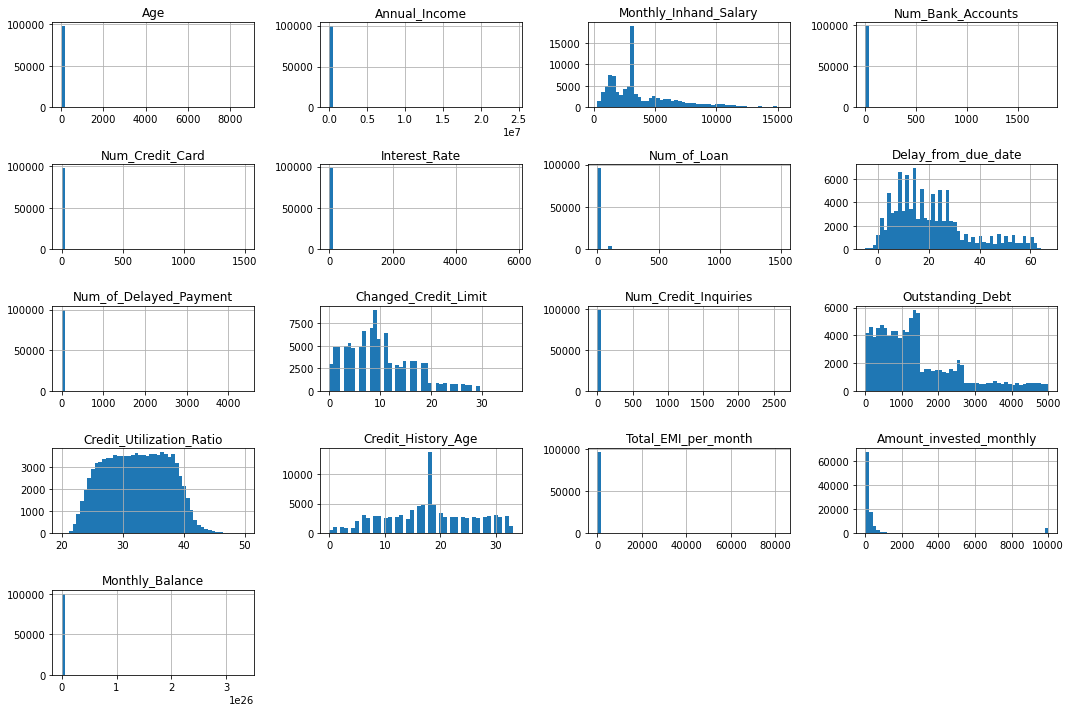

In [ ]:


all_numeric = df.select_dtypes(include=[np.number]).columns

# Filter out columns that are effectively binary or near-binary(e.g., those with <= 2 unique values)
numeric_cols = [col for col in all_numeric if df[col].nunique() > 2]

# plot histograms for truly numeric columns
df[numeric_cols].hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

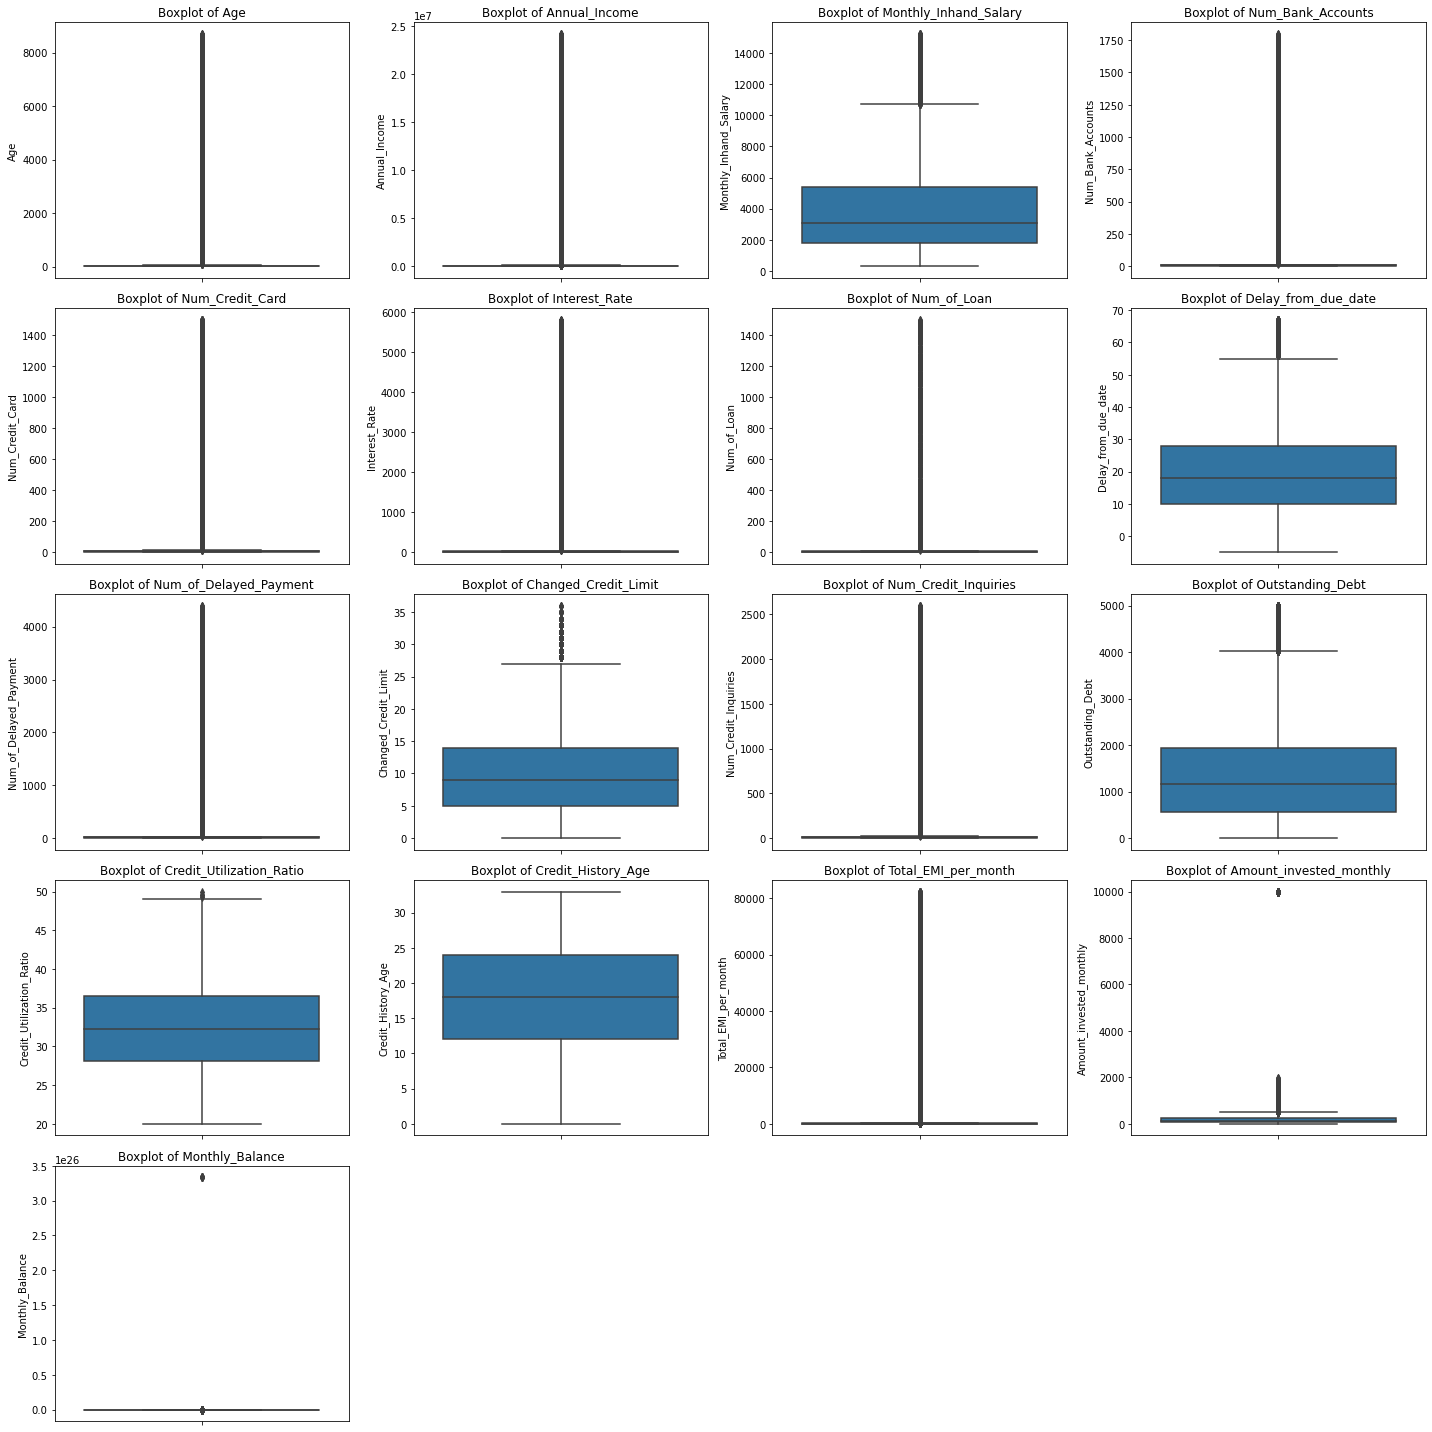

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# grid layout for boxplots
n = len(numeric_cols)
rows = int(math.ceil(math.sqrt(n)))
cols = int(math.ceil(n / rows))


fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))


axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

#dealing with unused
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Overall: Many numeric features show heavy skew and extreme outliers (likely data-entry issues or genuine rare cases). In order to understand this further, we will inspect variables individually and decide on way forward. Some initial nots:
Income & Salary: Highly skewed; a few very large values dominate.
Bank/Credit Counts: Mostly small (under 10), but some extreme spikes (hundreds+).
Interest Rate: Typically under 30–40%, but extreme cases in the thousands.
Loans & Delays: Most users have modest loan counts and delays, but a fraction show huge numbers.
Outstanding Debt & Monthly Balance: Large ranges with extremely high outliers.
Next Steps: Log transforms, capping/winsorizing, and verifying domain plausibility for outliers.

Creating a function to handle numeric anomalies


In [31]:
def handle_outliers_with_last_valid(df, col_name, cutoff, id_col="Customer_ID"):
  
    # 1. Identify rows where col_name > cutoff
    outlier_rows = df[df[col_name] > cutoff]
    print(f"Rows over {cutoff} for {col_name} before fix: {len(outlier_rows)}")

    # 2. Attempt to replace with last valid value
    for index, row in outlier_rows.iterrows():
        cust_id = row[id_col]

        # Find the last occurrence (earlier index) for this cust_id where col_name <= cutoff
        last_valid_row = df[
            (df[id_col] == cust_id) &
            (df[col_name] <= cutoff) &
            (df.index < index)
        ].sort_index(ascending=False).head(1)
        
        # If found, replace current value with that valid value
        if not last_valid_row.empty:
            df.at[index, col_name] = last_valid_row[col_name].values[0]

    # 3. Check how many remain over cutoff
    still_over_cutoff = df[df[col_name] > cutoff]
    print(f"Rows still over {cutoff} for {col_name} after last-valid replacement: {len(still_over_cutoff)}")

    # 4. Cap any remaining outliers at cutoff
    df.loc[df[col_name] > cutoff, col_name] = cutoff

    # Final verification
    print(df[col_name].describe())

    return df




Inspecting Variable: Age

Max age seen as 8698, we assume there's data entry challenges. given avg age in the US is around 80, we allow for a higher threshold and cut off at 110. 


In [32]:

df = handle_outliers_with_last_valid(
    df=df,
    col_name="Age",
    cutoff=110,           
    id_col="Customer_ID"   
)


Rows over 110 for Age before fix: 0
Rows still over 110 for Age after last-valid replacement: 0
count    100000.00000
mean         33.61685
std          11.77708
min          14.00000
25%          24.00000
50%          33.00000
75%          42.00000
max         110.00000
Name: Age, dtype: float64


Inspecting Varaible: Months

Month - Converting from Categorical

Converting Month to non-categorical, using cyclical encoding given cylical nature of months. This Preserves the fact that month 12 (December) is close to month 1 (January) and often yields better results for time-of-year effects in certain models. We will test need for month and then decide way forward in our model given we don't antipate month playing a strong role in credit score prediction

In [ ]:
#MONTHS - CYCLICAL ENCODING

# Map months
month_map = {
    'January': 1, 'Jan': 1,
    'February': 2, 'Feb': 2,
    'March': 3, 'Mar': 3,
    'April': 4, 'Apr': 4,
    'May': 5,
    'June': 6, 'Jun': 6,
    'July': 7, 'Jul': 7,
    'August': 8, 'Aug': 8,
    'September': 9, 'Sep': 9,
    'October': 10, 'Oct': 10,
    'November': 11, 'Nov': 11,
    'December': 12, 'Dec': 12
}

df["Month_num"] = df["Month"].map(month_map)

df["Month_num"] = df["Month"].map(month_map)

# create cyclical features
df["Month_sin"] = np.sin(2 * np.pi * df["Month_num"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["Month_num"] / 12)


Inspecting Variables: Occupation

Occupation Value Counts:
 _______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64


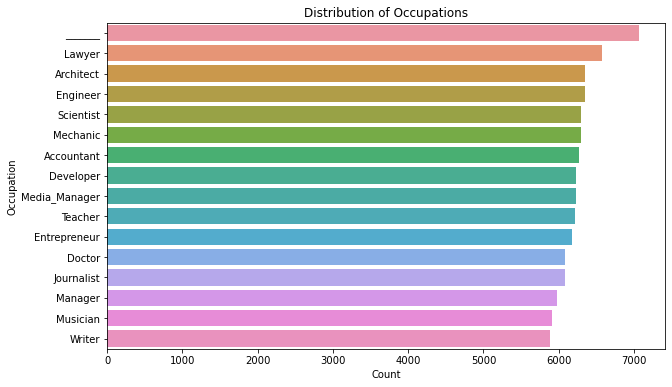

In [ ]:
import seaborn as sns
occupation_counts = df['Occupation'].value_counts()
print("Occupation Value Counts:\n", occupation_counts)

# 2. Bar Plot (Visual Distribution)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.countplot(y='Occupation', data=df, order=df['Occupation'].value_counts().index) #order by most frequent.
plt.title('Distribution of Occupations')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()


One-Hot Encode post dealing with  7062 values shown as not ___.
We assume this is from users who didn't fill an Occupation, this may be because they don't have a job or don't wnat to share, this in itself can be telling. so we will impute this as unkown

In [ ]:
df["Occupation"] = df["Occupation"].replace("_______", "Unknown")
df = pd.get_dummies(df, columns=["Occupation"], prefix="Occ", drop_first=True)


Annual Income
check for outliers given earlier data descriptions + histogram insights

In [26]:

income_mean = df["Annual_Income"].mean()
income_std = df["Annual_Income"].std()

# Compute Z-scores
df["income_zscore"] = (df["Annual_Income"] - income_mean) / income_std

# Choose a threshold, e.g., |z| > 3 for "extreme" outliers
outliers_z = df[np.abs(df["income_zscore"]) > 3]
print("Number of outliers by Z-score:", len(outliers_z))


# we expect outliers in income related data -- check if this makes sense with real world knowlede
threshold = 1_000_000  
num_above_threshold = df[df["Annual_Income"] > threshold].shape[0]
pct_above_threshold = num_above_threshold / len(df) * 100

print(f"Number of people above ${threshold}: {num_above_threshold}")
print(f"Percentage of dataset: {pct_above_threshold:.2f}%")
#As often shared -- top 1% have extraordirarily high incomes



Number of outliers by Z-score: 830
Number of people above $1000000: 961
Percentage of dataset: 0.96%


In [27]:

quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]

total_count = len(df)

print("High-end percentile analysis for Annual_Income:")
for q in quantiles:
    cutoff_value = df["Annual_Income"].quantile(q)
    # Count how many rows exceed this cutoff
    above_cutoff = (df["Annual_Income"] > cutoff_value).sum()
    pct_above = (above_cutoff / total_count) * 100

    print(f"Percentile: {q*100:.1f}%")
    print(f"  - Cutoff Value: {cutoff_value:,.2f}")
    print(f"  - # of People Above: {above_cutoff} ({pct_above:.2f}% of dataset)")
    print("-" * 50)


High-end percentile analysis for Annual_Income:
Percentile: 90.0%
  - Cutoff Value: 113,085.00
  - # of People Above: 9993 (9.99% of dataset)
--------------------------------------------------
Percentile: 95.0%
  - Cutoff Value: 134,533.00
  - # of People Above: 4997 (5.00% of dataset)
--------------------------------------------------
Percentile: 99.0%
  - Cutoff Value: 179,987.00
  - # of People Above: 999 (1.00% of dataset)
--------------------------------------------------
Percentile: 99.5%
  - Cutoff Value: 12,920,957.09
  - # of People Above: 500 (0.50% of dataset)
--------------------------------------------------
Percentile: 99.9%
  - Cutoff Value: 21,752,126.02
  - # of People Above: 100 (0.10% of dataset)
--------------------------------------------------


In [ ]:
df = handle_outliers_with_last_valid(
    df=df,
    col_name="Annual_Income",
    cutoff=1000000,        # covers more than 99%     
    id_col="Customer_ID"   
)

Rows over 1000000 for Annual_Income before fix: 264
Rows still over 1000000 for Annual_Income after last-valid replacement: 139
count     100000.00000
mean       52024.91634
std        53250.74894
min         7005.00000
25%        19368.25000
50%        37085.00000
75%        71826.25000
max      1000000.00000
Name: Annual_Income, dtype: float64


Month in Hand Salary

In [36]:
# we will the same for Income salary -- given both are an indicator of income, we will eventually use of the variables

# Calculate mean and standard deviation for Monthly_Inhand_Salary
income_mean = df['Monthly_Inhand_Salary'].mean()
income_std = df['Monthly_Inhand_Salary'].std()

# Compute Z-scores for Monthly_Inhand_Salary
df['income_zscore'] = (df['Monthly_Inhand_Salary'] - income_mean) / income_std

# Identify outliers using Z-score threshold
outliers_z = df[np.abs(df['income_zscore']) > 3]
print("Number of outliers by Z-score:", len(outliers_z))


for q in quantiles:
    cutoff_value = df["Monthly_Inhand_Salary"].quantile(q)
    # Count how many rows exceed this cutoff
    above_cutoff = (df["Monthly_Inhand_Salary"] > cutoff_value).sum()
    pct_above = (above_cutoff / total_count) * 100

    print(f"Percentile: {q*100:.1f}%")
    print(f"  - Cutoff Value: {cutoff_value:,.2f}")
    print(f"  - # of People Above: {above_cutoff} ({pct_above:.2f}% of dataset)")
    print("-" * 50)


Number of outliers by Z-score: 1414
Percentile: 90.0%
  - Cutoff Value: 8,595.47
  - # of People Above: 9997 (10.00% of dataset)
--------------------------------------------------
Percentile: 95.0%
  - Cutoff Value: 10,474.43
  - # of People Above: 5000 (5.00% of dataset)
--------------------------------------------------
Percentile: 99.0%
  - Cutoff Value: 13,580.73
  - # of People Above: 998 (1.00% of dataset)
--------------------------------------------------
Percentile: 99.5%
  - Cutoff Value: 14,351.65
  - # of People Above: 499 (0.50% of dataset)
--------------------------------------------------
Percentile: 99.9%
  - Cutoff Value: 14,866.45
  - # of People Above: 97 (0.10% of dataset)
--------------------------------------------------


In [45]:
#repace anomalies with previous value for same consumer 
threshold = 13500 #based on percentile


over_threshold = df[df["Monthly_Inhand_Salary"] > threshold]
print(f"Rows over {threshold} before fix: {len(over_threshold)}")


for index, row in over_threshold.iterrows():
    cust_id = row["Customer_ID"]
    
    # Find the last occurrence (earlier index) for the same Customer_ID with salary <= threshold
    last_valid_row = df[
        (df["Customer_ID"] == cust_id) &
        (df["Monthly_Inhand_Salary"] <= threshold) &
        (df.index < index)
    ].sort_index(ascending=False).head(1)
    
    # If found, replace the current outlier with that valid value
    if not last_valid_row.empty:
        df.at[index, "Monthly_Inhand_Salary"] = last_valid_row["Monthly_Inhand_Salary"].values[0]

# Check how many remain above threshold
still_over = df[df["Monthly_Inhand_Salary"] > threshold]
print(f"Rows over {threshold} after last-valid replacement: {len(still_over)}")


Rows over 13500 before fix: 1065
Rows over 13500 after last-valid replacement: 671


In [38]:
df['Monthly_Inhand_Salary'].describe()

count    100000.000000
mean       4029.084964
std        2961.363540
min         303.645417
25%        1792.084167
50%        3093.745000
75%        5371.525000
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [ ]:
#once again we will log tansform
# Log transform Monthly_Inhand_Salary
df['Monthly_Inhand_Salary_log'] = np.log1p(df['Monthly_Inhand_Salary'])

# Visualize log-transformed Monthly_Inhand_Salary
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Monthly_Inhand_Salary_log', bins=50, kde=True)
plt.title("Log-Transformed Monthly Inhand Salary")
plt.show()

Inspecting Varaibles: Number of Bank Accounts


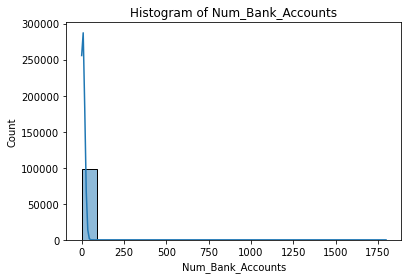

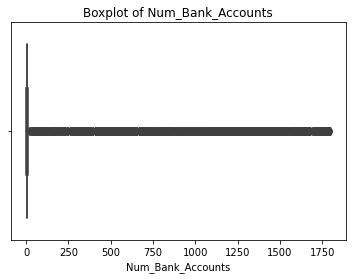

In [ ]:
#review bank account details again
df['Num_Bank_Accounts'].describe()

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Num_Bank_Accounts", bins=20, kde=True)
plt.title("Histogram of Num_Bank_Accounts")
plt.show()

# 4. Boxplot (to see outliers/variance)
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Num_Bank_Accounts"])
plt.title("Boxplot of Num_Bank_Accounts")
plt.show()



In [ ]:



# Calculate the size of the DataFrame for reference
total_count = len(df)

print("Num_Bank_Accounts high-end percentile analysis:")
for q in quantiles:
    threshold = df["Num_Bank_Accounts"].quantile(q)
    # Number of rows at or below the threshold
    num_at_or_below = (df["Num_Bank_Accounts"] <= threshold).sum()
    # Number of rows strictly above the threshold
    num_above = total_count - num_at_or_below

    print(f"{q*100:.1f}th percentile = {threshold:.2f}, # people above this % = {num_above}")



Num_Bank_Accounts high-end percentile analysis:
90.0th percentile = 9.00, # people above this % = 6571
95.0th percentile = 10.00, # people above this % = 1324
99.0th percentile = 445.01, # people above this % = 1000
99.5th percentile = 1096.00, # people above this % = 497
99.9th percentile = 1650.00, # people above this % = 100


 upon researching, we see there's no limit to bank accounts. However a max of 1798 bank account is clearly an error. as per Evolve an average person has 5.6 bank accounts. Lets assume people wealth may be signifcantly above average , ie 5-6 times average. we will therefore winsorize and cap at 30.

In [39]:
df = handle_outliers_with_last_valid(
    df=df,
    col_name="Num_Bank_Accounts",
    cutoff=30,           
    id_col="Customer_ID"   
)

Rows over 30 for Num_Bank_Accounts before fix: 1307
Rows still over 30 for Num_Bank_Accounts after last-valid replacement: 163
count    100000.000000
mean          5.410950
std           2.782155
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max          30.000000
Name: Num_Bank_Accounts, dtype: float64


In [40]:
#assume negative means no bank account 
df.loc[df["Num_Bank_Accounts"] < 0, "Num_Bank_Accounts"] = 0

Reviewing Variable: Num_Credit_Card

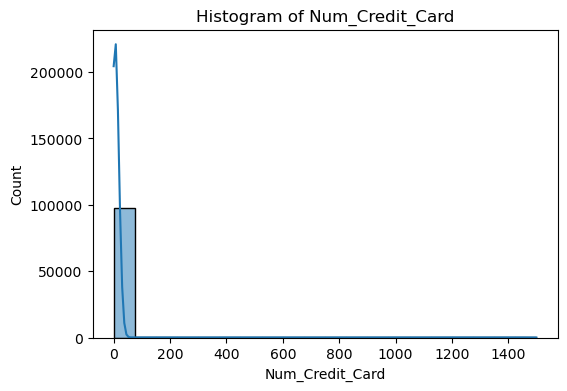

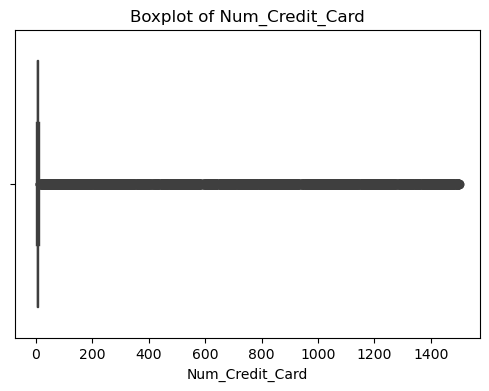

High-end percentiles for Num_Credit_Card:
90th percentile: 9.0
95th percentile: 10.0
99th percentile: 849.0
99th percentile: 1177.0
99th percentile: 1432.0020000000077


In [41]:
#review bank account details again - #max 1499, min 0
df['Num_Credit_Card'].describe()

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Num_Credit_Card", bins=20, kde=True)
plt.title("Histogram of Num_Credit_Card")
plt.show()

# 4. Boxplot (to see outliers/variance)
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Num_Credit_Card"])
plt.title("Boxplot of Num_Credit_Card")
plt.show()


q_values = df["Num_Credit_Card"].quantile(quantiles)

print("High-end percentiles for Num_Credit_Card:")
for q in quantiles:
    print(f"{int(q*100)}th percentile: {df['Num_Credit_Card'].quantile(q)}")


average credit cards is 3-4. While there's no limit on how many, lets assume 20 is the max one would have and winsorize at that if no previous value found


In [42]:
df = handle_outliers_with_last_valid(
    df=df,
    col_name="Num_Credit_Card",
    cutoff=20,         
    id_col="Customer_ID"   
)

Rows over 20 for Num_Credit_Card before fix: 2263
Rows still over 20 for Num_Credit_Card after last-valid replacement: 288
count    100000.00000
mean          5.57628
std           2.20729
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max          20.00000
Name: Num_Credit_Card, dtype: float64


Reviewing Variable: Interest Rate

In [ ]:
print(df['Interest_Rate'].describe())

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64


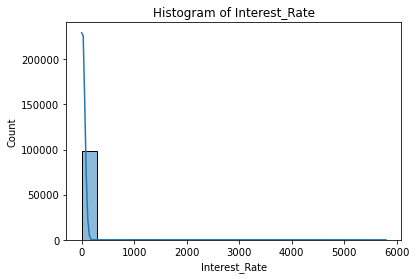

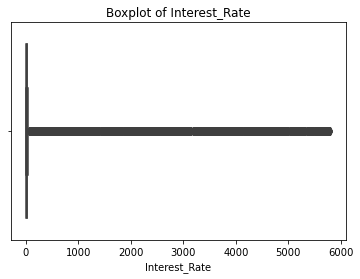

In [ ]:

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Interest_Rate", bins=20, kde=True)
plt.title("Histogram of Interest_Rate")
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Interest_Rate"])
plt.title("Boxplot of Interest_Rate")
plt.show()

In [ ]:

# Quantile analysis
quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]
q_values = df["Interest_Rate"].quantile(quantiles)

print("High-end percentiles for Interest_Rate:")
for q in quantiles:
    print(f"{int(q * 100)}th percentile: {df['Interest_Rate'].quantile(q)}")

High-end percentiles for Interest_Rate:
90th percentile: 29.0
95th percentile: 33.0
99th percentile: 2865.0099999999948
99th percentile: 4311.010000000009
99th percentile: 5547.001000000004


In [43]:
df = handle_outliers_with_last_valid(
    df=df,
    col_name="Interest_Rate",
    cutoff=40,         # given very high interest rates, and the fact that credit cards rarely exceed 35-40%. we will cap at 40% (which will still cover over 95%)
    id_col="Customer_ID"   
)

Rows over 40 for Interest_Rate before fix: 2034
Rows still over 40 for Interest_Rate after last-valid replacement: 247
count    100000.000000
mean         14.595490
std           8.821211
min           1.000000
25%           7.000000
50%          13.000000
75%          20.000000
max          40.000000
Name: Interest_Rate, dtype: float64


Inspecting Variable: Delay_from_Due_Date

In [ ]:
print(df['Delay_from_due_date'].describe())


count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64


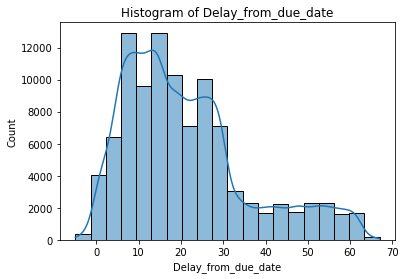

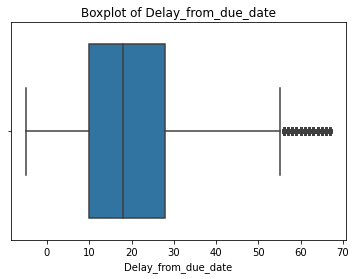

High-end percentiles for Delay_from_due_date:
90th percentile: 45.0
95th percentile: 54.0
99th percentile: 61.0
99th percentile: 62.0
99th percentile: 65.0


In [ ]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Delay_from_due_date", bins=20, kde=True)
plt.title("Histogram of Delay_from_due_date")
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Delay_from_due_date"])
plt.title("Boxplot of Delay_from_due_date")
plt.show()

# Quantile analysis
quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]
q_values = df["Delay_from_due_date"].quantile(quantiles)

print("High-end percentiles for Delay_from_due_date:")
for q in quantiles:
    print(f"{int(q * 100)}th percentile: {df['Delay_from_due_date'].quantile(q)}")

In [ ]:
mean_delay = df["Delay_from_due_date"].mean()
std_delay = df["Delay_from_due_date"].std()

# Z-score for each value
df["Delay_Zscore"] = (df["Delay_from_due_date"] - mean_delay) / std_delay

# Outliers: abs(Z-score) > 3
outliers_z = df[df["Delay_Zscore"].abs() > 3]
print("\nZ-Score Method:")
print(f"Mean = {mean_delay}, Std Dev = {std_delay}")
print(f"Number of outliers (|Z| > 3) = {len(outliers_z)}")



Z-Score Method:
Mean = 21.06878, Std Dev = 14.860104223677403
Number of outliers (|Z| > 3) = 54


Inspecting Variable: Num of Delayed Payments

In [ ]:
print(df['Num_of_Delayed_Payment'].describe())

count    100000.000000
mean         29.759690
std         218.014703
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64


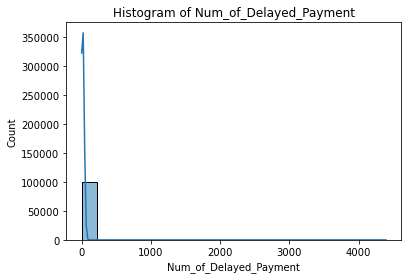

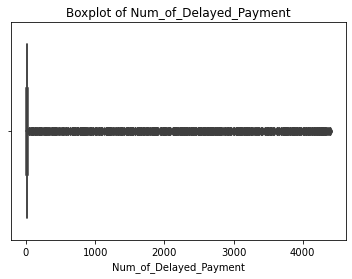

In [ ]:
# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x="Num_of_Delayed_Payment", bins=20, kde=True)
plt.title("Histogram of Num_of_Delayed_Payment")
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Num_of_Delayed_Payment"])
plt.title("Boxplot of Num_of_Delayed_Payment")
plt.show()

In [ ]:


# Quantile analysis
quantiles = [0.90, 0.95, 0.99, 0.995, 0.999]
q_values = df["Num_of_Delayed_Payment"].quantile(quantiles)

print("High-end percentiles for Num_of_Delayed_Payment:")
for q in quantiles:
    print(f"{int(q * 100)}th percentile: {df['Num_of_Delayed_Payment'].quantile(q)}")

High-end percentiles for Num_of_Delayed_Payment:
90th percentile: 21.0
95th percentile: 23.0
99th percentile: 27.0
99th percentile: 1511.0600000000559
99th percentile: 3815.0040000000154


In [44]:
df = handle_outliers_with_last_valid(
    df=df,
    col_name="Num_of_Delayed_Payment",
    cutoff=30,        # Cap all values above 30 to 30 given it cover 99%
    id_col="Customer_ID"   
)

Rows over 30 for Num_of_Delayed_Payment before fix: 736
Rows still over 30 for Num_of_Delayed_Payment after last-valid replacement: 90
count    100000.00000
mean         13.39690
std           6.05782
min           0.00000
25%           9.00000
50%          14.00000
75%          18.00000
max          30.00000
Name: Num_of_Delayed_Payment, dtype: float64


In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Month_num,Month_sin,Month_cos,Occ_Architect,Occ_Developer,Occ_Doctor,Occ_Engineer,Occ_Entrepreneur,Occ_Journalist,Occ_Lawyer,Occ_Manager,Occ_Mechanic,Occ_Media_Manager,Occ_Musician,Occ_Scientist,Occ_Teacher,Occ_Unknown,Occ_Writer,income_zscore,Annual_Income_log,Monthly_Inhand_Salary_log,Delay_Zscore
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.0,4.0,_,809,26.822620,22.0,No,49.574949,80.0,High_spent_Small_value_payments,312.0,Good,1,0.500000,8.660254e-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.744333,9.858229,7.509797,-1.215926
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,14.0,11.0,4.0,Good,809,31.944960,18.0,No,49.574949,118.0,Low_spent_Large_value_payments,284.0,Good,2,0.866025,5.000000e-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.315848,9.858229,8.037461,-1.485103
2,0x1604,CUS_0xd40,March,Aaron Maashoh,33.0,821-00-0265,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,9.0,4.0,Good,809,28.609352,22.0,No,49.574949,81.0,Low_spent_Medium_value_payments,331.0,Good,3,1.000000,6.123234e-17,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.315848,9.858229,8.037461,-1.215926
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,19114,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.0,4.0,Good,809,31.377862,22.0,No,49.574949,199.0,Low_spent_Small_value_payments,223.0,Good,4,0.866025,-5.000000e-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.315848,9.858229,8.037461,-1.081337
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,19114,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,14.0,11.0,4.0,Good,809,24.797347,22.0,No,49.574949,41.0,High_spent_Medium_value_payments,341.0,Good,5,0.500000,-8.660254e-01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.744333,9.858229,7.509797,-1.014043


In [ ]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_num,Month_sin,Month_cos,Occ_Architect,Occ_Developer,Occ_Doctor,Occ_Engineer,Occ_Entrepreneur,Occ_Journalist,Occ_Lawyer,Occ_Manager,Occ_Mechanic,Occ_Media_Manager,Occ_Musician,Occ_Scientist,Occ_Teacher,Occ_Unknown,Occ_Writer,income_zscore,Annual_Income_log,Monthly_Inhand_Salary_log,Delay_Zscore
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05
mean,33.314300,1.764152e+05,4029.084964,5.691490,5.861580,15.049630,3.534230,21.068780,13.506540,9.945490,27.326780,1425.722400,32.285173,17.969540,1403.118217,614.454560,3.000000e+22,4.500000,0.295753,-0.295753,0.063550,0.062350,0.060870,0.063500,0.061740,0.060850,0.065750,0.059730,0.062910,0.062320,0.059110,0.062990,0.062150,0.07062,0.058850,-1.459080e-13,10.591799,8.043689,3.816997e-16
std,10.628376,1.429618e+06,2961.363540,3.807897,2.969267,9.367745,2.451532,14.860104,6.183489,6.605945,191.293766,1155.131822,5.116875,7.935336,8306.041270,1999.832038,3.162151e+24,2.291299,0.642288,0.642288,0.243951,0.241791,0.239093,0.243861,0.240684,0.239056,0.247846,0.236987,0.242802,0.241737,0.235832,0.242946,0.241429,0.25619,0.235345,1.000000e+00,0.964912,0.737660,1.000000e+00
min,14.000000,7.005000e+03,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,-0.866025,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.258015e+00,8.854522,5.719149,-1.754280e+00
25%,25.000000,1.945700e+04,1792.084167,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.000000,3.000000,566.000000,28.052567,12.000000,30.306660,77.000000,2.710000e+02,2.750000,-0.125000,-0.866025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-7.553955e-01,9.876014,7.491692,-7.448656e-01
50%,33.000000,3.757800e+04,3093.745000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.000000,6.000000,1166.000000,32.305784,18.000000,69.249473,135.000000,3.360000e+02,4.500000,0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-3.158477e-01,10.534201,8.037461,-2.065113e-01
75%,41.000000,7.279000e+04,5371.525000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.000000,9.000000,1945.250000,36.496663,24.000000,161.224249,255.000000,4.630000e+02,6.250000,0.866025,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.533182e-01,11.195348,8.589053,4.664315e-01
max,100.000000,2.419806e+07,15204.633333,30.000000,20.000000,40.000000,29.000000,67.000000,30.000000,36.000000,2597.000000,4998.000000,50.000000,33.000000,82331.000000,10000.000000,3.333333e+26,8.000000,1.000000,0.866025,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,3.773785e+00,17.001783,9.629421,3.090908e+00


- Fixing anomalies in Num_Credit_Inquiries

In [ ]:
df[df['Num_Credit_Inquiries'] >50].head()

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Month_num,Month_sin,Month_cos,Occ_Architect,Occ_Developer,Occ_Doctor,Occ_Engineer,Occ_Entrepreneur,Occ_Journalist,Occ_Lawyer,Occ_Manager,Occ_Mechanic,Occ_Media_Manager,Occ_Musician,Occ_Scientist,Occ_Teacher,Occ_Unknown,Occ_Writer,income_zscore,Annual_Income_log,Monthly_Inhand_Salary_log,Delay_Zscore
173,0x1703,CUS_0xa16e,June,Lee Chyenz,42.0,905-50-7912,10183,1074.584583,7,5,17,5,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",48,24.0,10.0,1050.0,Bad,1672,25.105403,10.0,Yes,37.588073,73.0,Low_spent_Small_value_payments,285.0,Poor,6,1.224647e-16,-1.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.997682,9.228573,6.980620,1.812317
193,0x1723,CUS_0xa5f9,February,Rickt,34.0,189-09-5267,57983,3093.745000,9,8,31,8,"Payday Loan, Not Specified, Credit-Builder Loa...",53,21.0,7.0,1044.0,Bad,3532,37.873642,12.0,Yes,200.432613,193.0,High_spent_Medium_value_payments,327.0,Standard,2,8.660254e-01,5.000000e-01,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.315848,10.967922,8.037461,2.148788
198,0x1728,CUS_0xa5f9,July,Rickt,34.0,189-09-5267,57983,4720.926667,9,8,31,8,"Payday Loan, Not Specified, Credit-Builder Loa...",49,21.0,7.0,1936.0,Bad,3532,24.631497,12.0,Yes,200.432613,234.0,Low_spent_Medium_value_payments,316.0,Standard,7,-5.000000e-01,-8.660254e-01,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.233623,10.967922,8.459972,1.879611
234,0x1760,CUS_0xb681,March,Sarahb,37.0,904-88-7361,39641,3007.461667,10,8,25,6,"Auto Loan, Student Loan, Payday Loan, Payday L...",61,15.0,1.0,568.0,Bad,2258,27.572863,8.0,Yes,172.382527,198.0,High_spent_Small_value_payments,190.0,Poor,3,1.000000e+00,6.123234e-17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.344984,10.587644,8.009184,2.687143
312,0x17d6,CUS_0x571f,January,Emily Flitterl,18.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,7.0,1618.0,Standard,233,34.456272,24.0,No,37602.000000,251.0,Low_spent_Small_value_payments,518.0,Standard,1,5.000000e-01,8.660254e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.598100,11.105979,8.665833,-0.946748


In [ ]:
df[df['Customer_ID'] =='CUS_0x571f']

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Month_num,Month_sin,Month_cos,Occ_Architect,Occ_Developer,Occ_Doctor,Occ_Engineer,Occ_Entrepreneur,Occ_Journalist,Occ_Lawyer,Occ_Manager,Occ_Mechanic,Occ_Media_Manager,Occ_Musician,Occ_Scientist,Occ_Teacher,Occ_Unknown,Occ_Writer,income_zscore,Annual_Income_log,Monthly_Inhand_Salary_log,Delay_Zscore
312,0x17d6,CUS_0x571f,January,Emily Flitterl,18.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,7.0,1618.0,Standard,233,34.456272,24.0,No,37602.000000,251.0,Low_spent_Small_value_payments,518.0,Standard,1,5.000000e-01,8.660254e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748
313,0x17d7,CUS_0x571f,February,Emily Flitterl,18.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,14.0,5.0,0.0,Standard,233,32.349822,24.0,No,100.189361,542.0,Low_spent_Medium_value_payments,217.0,Standard,2,8.660254e-01,5.000000e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748
314,0x17d8,CUS_0x571f,March,Emily Flitterl,18.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,12.0,5.0,0.0,Standard,233,33.486848,24.0,No,100.189361,770.0,Low_spent_Small_value_payments,336.0,Standard,3,1.000000e+00,6.123234e-17,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748
315,0x17d9,CUS_0x571f,April,Emily Flitterl,18.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,14.0,4.0,0.0,Standard,233,33.293856,24.0,No,100.189361,526.0,Low_spent_Large_value_payments,222.0,Standard,4,8.660254e-01,-5.000000e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748
316,0x17da,CUS_0x571f,May,Emily Flitterl,19.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,5.0,0.0,Standard,233,26.549100,24.0,No,100.189361,149.0,!@9#%8,580.0,Standard,5,5.000000e-01,-8.660254e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748
317,0x17db,CUS_0x571f,June,Emily Flitterl,19.0,#F%$D@*&8,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,5.0,0.0,Standard,233,28.105704,24.0,No,100.189361,66.0,High_spent_Medium_value_payments,663.0,Standard,6,1.224647e-16,-1.000000e+00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748
318,0x17dc,CUS_0x571f,July,Emily Flitterl,19.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,15.0,5.0,0.0,Standard,233,26.507610,24.0,No,100.189361,66.0,High_spent_Medium_value_payments,663.0,Standard,7,-5.000000e-01,-8.660254e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748
319,0x17dd,CUS_0x571f,August,Emily Flitterl,19.0,397-28-9675,66567,5800.276667,5,7,5,2,"Mortgage Loan, and Not Specified",7,14.0,1.0,2.0,Standard,233,28.453786,18.0,NM,100.189361,82.0,High_spent_Large_value_payments,636.0,Standard,8,-8.660254e-01,-5.000000e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5981,11.105979,8.665833,-0.946748


- Replacing Num_Credit_Inquiries with last logical number of inquiries available (between 0-50)

In [ ]:
# Step 1: Identify rows where Num_Credit_Inquiries > 100
high_inquiry_rows = df[df["Num_Credit_Inquiries"] > 100]

# Step 2: Iterate over these rows and find the last valid (0-30 range) inquiry count
for index, row in high_inquiry_rows.iterrows():
    customer_id = row["Customer_ID"]  # Use the correct column name for customer ID

    # Find the last occurrence where Num_Credit_Inquiries is between 0 and 30 for this Customer_ID
    last_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Num_Credit_Inquiries"].between(0, 30)) &
        (df.index < index)  # Only consider past records
    ].sort_index(ascending=False).head(1)  # Get the last occurrence

    # Replace if a valid previous row is found
    if not last_valid_row.empty:
        df.at[index, "Num_Credit_Inquiries"] = last_valid_row["Num_Credit_Inquiries"].values[0]

- Replacing Num_Credit_Inquiries with next logical number (between 0-50) of inquiries available in case the last number is not available (Jan/Feb)

In [ ]:
# Step 1: Identify remaining rows where Num_Credit_Inquiries > 100
high_inquiry_rows = df[df["Num_Credit_Inquiries"] > 100]

# Step 2: Iterate over these rows and find the next valid (0-50 range) inquiry count
for index, row in high_inquiry_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the next occurrence where Num_Credit_Inquiries is between 0 and 50 for this Customer_ID
    next_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Num_Credit_Inquiries"].between(0, 50)) &
        (df.index > index)  # Only consider future records
    ].sort_index(ascending=True).head(1)  # Get the next occurrence

    # Replace if a valid next row is found
    if not next_valid_row.empty:
        df.at[index, "Num_Credit_Inquiries"] = next_valid_row["Num_Credit_Inquiries"].values[0]

In [ ]:
# Step 1: Identify rows where Total_EMI_per_month > 20000
high_emi_rows = df[df["Total_EMI_per_month"] > 150]

# Step 2: Iterate over these rows and check if previous and next values are the same
for index, row in high_emi_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Get previous and next index
    prev_index = index - 1
    next_index = index + 1

    # Check if both indices exist and belong to the same Customer_ID
    if (
        prev_index in df.index and
        next_index in df.index and
        df.at[prev_index, "Customer_ID"] == customer_id and
        df.at[next_index, "Customer_ID"] == customer_id
    ):
        # Check if previous and next values are the same
        prev_value = df.at[prev_index, "Total_EMI_per_month"]
        next_value = df.at[next_index, "Total_EMI_per_month"]

        if prev_value == next_value:
            df.at[index, "Total_EMI_per_month"] = prev_value  # Replace high value

In [ ]:
# Step 1: Identify remaining rows where Total_EMI_per_month > 20000
high_emi_rows = df[df["Total_EMI_per_month"] > 150]

# Step 2: Iterate over these rows and find the last lowest valid EMI
for index, row in high_emi_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the last occurrence where Total_EMI_per_month is lower for this Customer_ID
    last_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Total_EMI_per_month"] <= 150) &  # Only lower values
        (df.index < index)  # Only consider past records
    ].sort_index(ascending=False).head(1)  # Get the last occurrence

    # Replace if a valid previous row is found
    if not last_valid_row.empty:
        df.at[index, "Total_EMI_per_month"] = last_valid_row["Total_EMI_per_month"].values[0]

In [ ]:
# Step 1: Identify remaining rows where Total_EMI_per_month > 20000
high_emi_rows = df[df["Total_EMI_per_month"] > 150]

# Step 2: Iterate over these rows and find the next lowest valid EMI
for index, row in high_emi_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the next occurrence where Total_EMI_per_month is lower for this Customer_ID
    next_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Total_EMI_per_month"] <= 150) &  # Only lower values
        (df.index > index)  # Only consider future records
    ].sort_index(ascending=True).head(1)  # Get the next occurrence

    # Replace if a valid next row is found
    if not next_valid_row.empty:
        df.at[index, "Total_EMI_per_month"] = next_valid_row["Total_EMI_per_month"].values[0]


# Fixing anomalies in Monthly_Balance column

In [ ]:
# Step 1: Identify rows where Monthly_Balance is extremely high (> 50,000)
high_balance_rows = df[df["Monthly_Balance"] > 50000]  # Adjust condition if needed

# Step 2: Iterate over these rows and find the last valid (low) balance
for index, row in high_balance_rows.iterrows():
    customer_id = row["Customer_ID"]  # Ensure this column exists

    # Find the last occurrence where Monthly_Balance is < 50000 for this Customer_ID
    last_valid_row = df[
        (df["Customer_ID"] == customer_id) &
        (df["Monthly_Balance"] < 50000) &  # Only lower values
        (df.index < index)  # Only consider past records
    ].sort_index(ascending=False).head(1)  # Get the last occurrence

    # Replace if a valid previous row is found
    if not last_valid_row.empty:
        df.at[index, "Monthly_Balance"] = last_valid_row["Monthly_Balance"].values[0]


# LOOKING AT RELATIONSHIPS BETWEEN VARIABLES

Correlation heat map

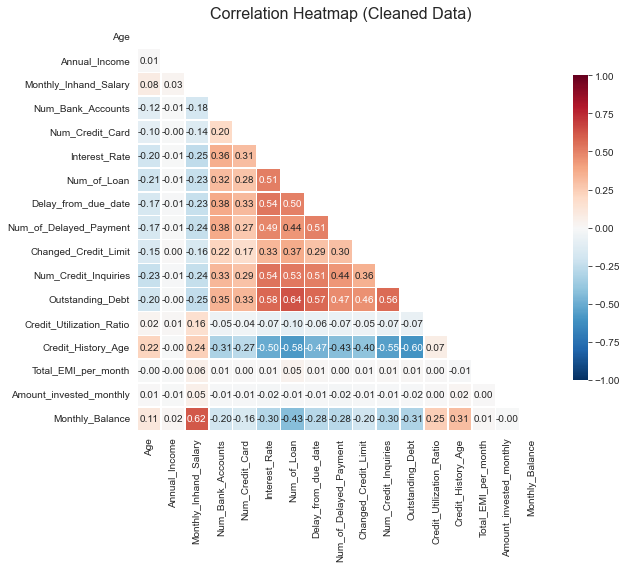

In [ ]:
#correlation heat map

corr_matrix = df[numeric_cols].corr()

#Generate  mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

#Customize figure
plt.figure(figsize=(10,8))
sns.set_style("white")

# 4. Draw the heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .75}
)

plt.title("Correlation Heatmap (Cleaned Data)", fontsize=16)
plt.tight_layout()
plt.show()


Correlation Insights
* Monthly In-hand Salary and Monthly Balance: As expected -  strong positive correlation (0.62) between monthly in-hand salary and monthly balance. While this is below 0.7 threshold, we will pick only one from these when analyzing.
* Outstanding_Debt & Number_of Loans - we assume this is coming from people going into debt cycles . it also makes sense that credit history age and outstanding debt have negative correlation, as we expect that it takes time for debt to accumulate and become outstanding.
* Debt and Credit Inquiries: Number of Credit inquiries and Outstanding Debt are highly correlated.
* Loans, Delays and Inquiries: Number of Loans, Delay from due date and Number of credit inquiries are correlated.



Numeric Features vs Credit_Score

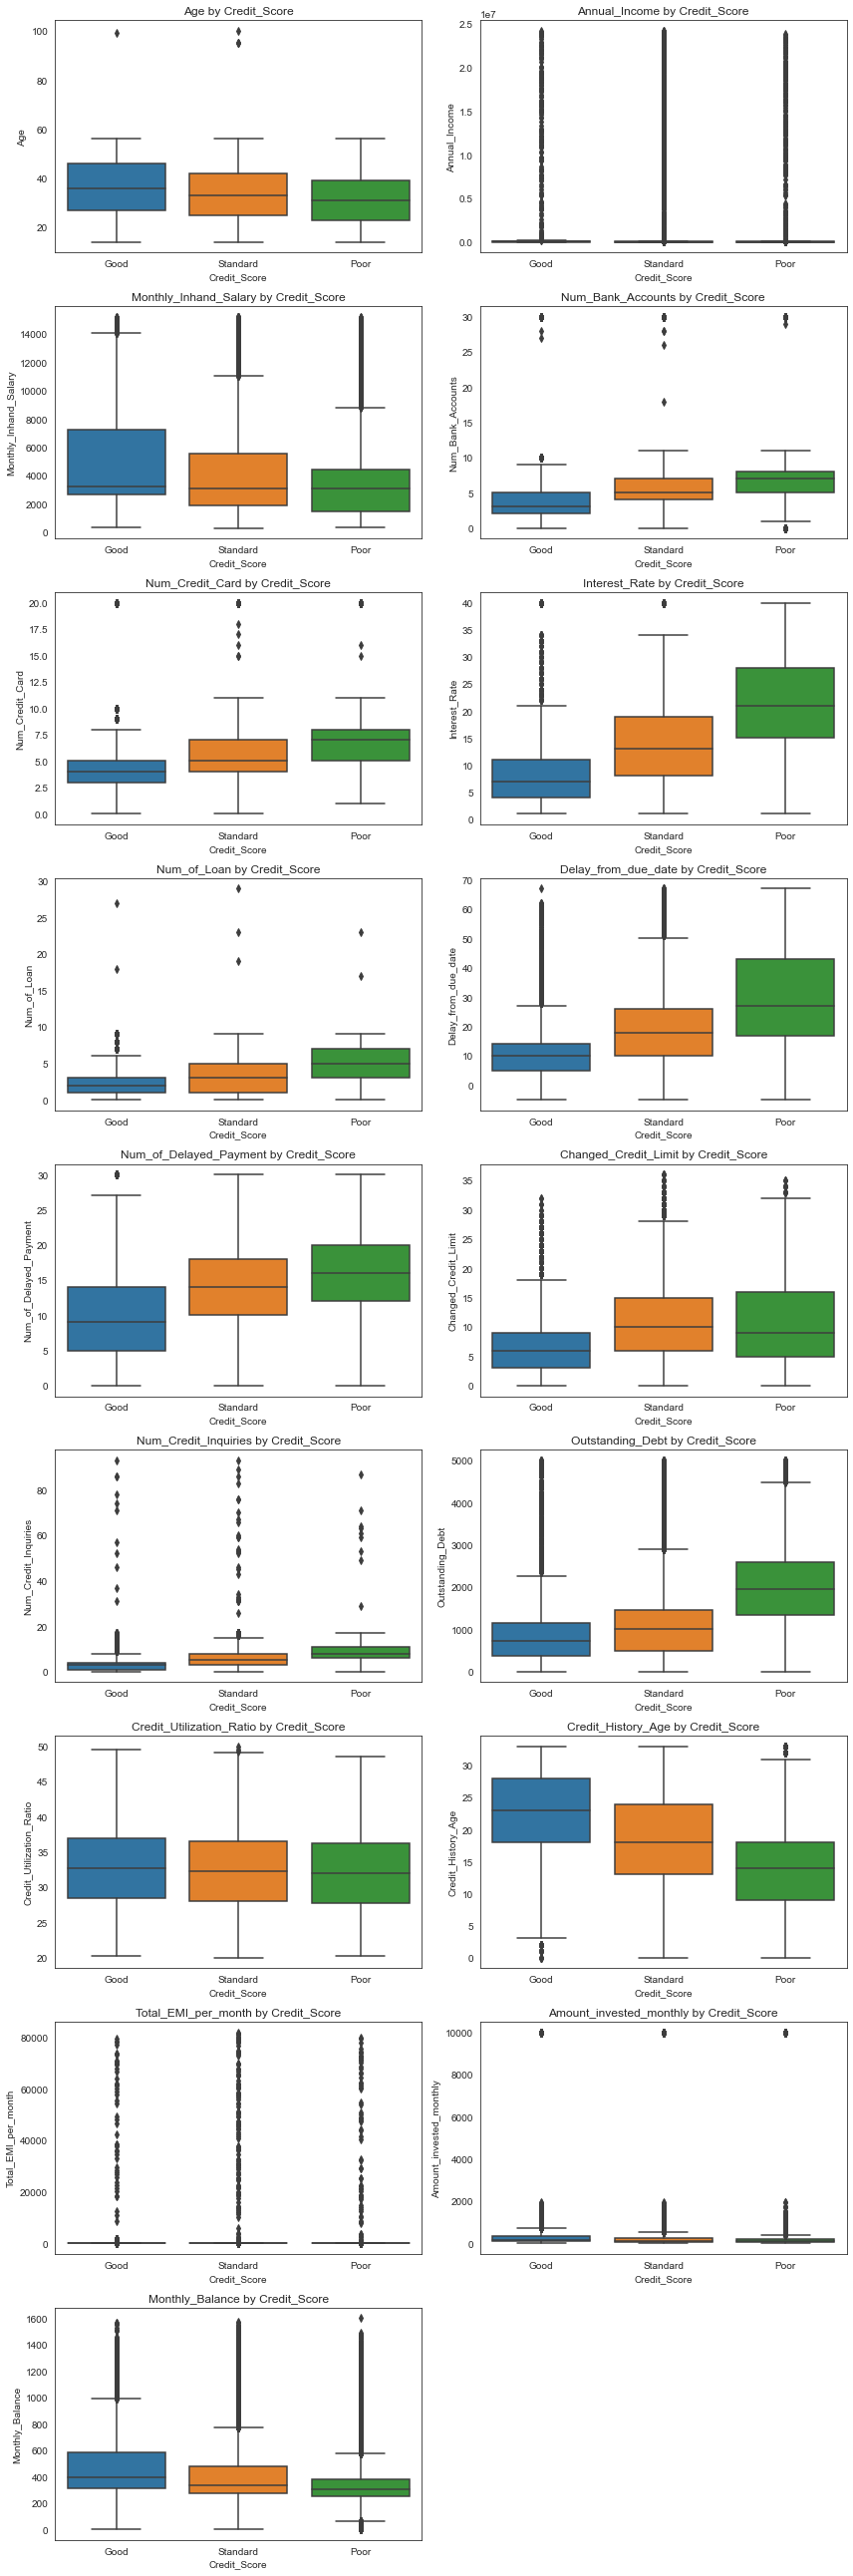

In [ ]:
numeric_cols = [
    "Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts",
    "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date",
    "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries",
    "Outstanding_Debt", "Credit_Utilization_Ratio", "Credit_History_Age",
    "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"
]

num_cols = 2
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols

plt.figure(figsize=(12, 4 * num_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x="Credit_Score", y=col, data=df)
    plt.title(f"{col} by Credit_Score")
    plt.tight_layout()

plt.show()

Insights from Numeric Features vs Credit Score
While outliers exist, some key insights

Monthly Inhand Salary: While median doesnt chagne much, IQR range increases with better performance.

Some patterns seen with decline in credit score:
- Decrease in Age median
- Interest rate seems to increase
- higher No. of Bank Accounts & Credit Card
-Higher Number of delayed payments, changed credit limits, number of credit inquires, outstanding debt.
- Lower Credit History Age

Credit Utilization Ratio is quite similarly distributed.


**Relationship between credit score & categorical variables**

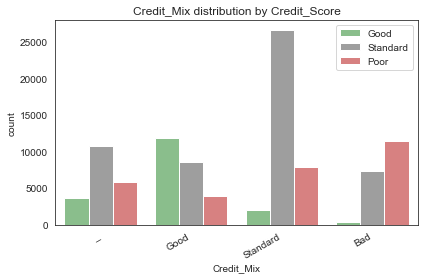

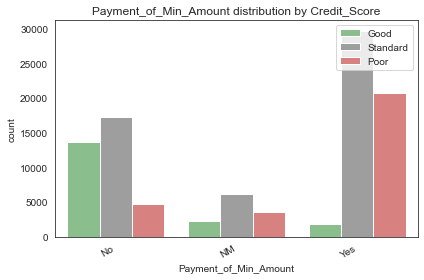

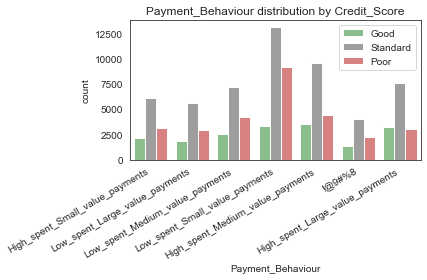

In [ ]:

categorical_cols = [
    "Credit_Mix",
    "Payment_of_Min_Amount",
    "Payment_Behaviour"
]

color_palette = {
    "Poor": "#E57373",  # Light red (salmon)
    "Standard": "#9E9E9E",  # Medium grey
    "Good": "#81C784"  # Light green (mint)
}

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="Credit_Score", data=df, palette=color_palette)  # Apply the palette
    plt.title(f"{col} distribution by Credit_Score")
    plt.xticks(rotation=30, ha='right', va='top')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

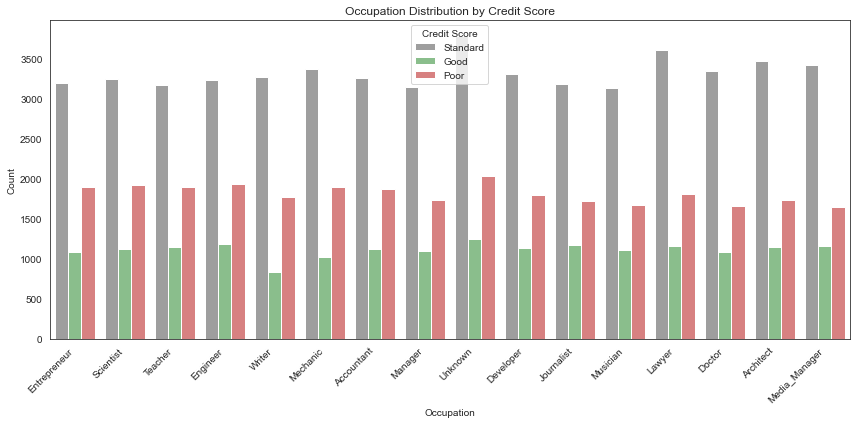

In [ ]:

#GIVEN WE ENCODED OCCUPATION, USE ORIGINAL ADATESET
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=train_data, palette=color_palette)


plt.title('Occupation Distribution by Credit Score')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Credit Score')
plt.tight_layout()

plt.show()

**Insights from categorical variable split**

Credit Mix - as expected - we see a link here . we assume these to be dependent on one another.

Minimum Payments: "Good" scores show varied payment habits. "Standard" scores usually pay the minimum. "Poor" scores also lean towards minimum payments, but many don't pay.

Payment Behavior: Most people make mixed payments. "Standard" scores have higher counts in all categories. "Poor" scores are more common with high-value spending and unusual payment patterns.

Occupation: Most people have "Standard" credit, regardless of their job. The number of "Good" and "Poor" scores is fairly consistent across different jobs.